In [1]:
import subprocess
import csv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cmd = ['./cg', 'bcsstk13.mtx', 'foo']
samples = np.logspace(0,6,10,dtype=int)
output_file = 'output.csv'
with open(output_file, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Iterations', 'ratio', 'Anorm'])
    for sample in tqdm(samples):
        cmd[2] = f'{sample}'
        res = subprocess.run(cmd, stdout=subprocess.PIPE, text=True)
        output = res.stdout.strip()
        x, y, z = map(float, output.split(','))
        writer.writerow([x,y,z])


100%|██████████| 10/10 [02:34<00:00, 15.43s/it]


In [3]:
data = pd.read_csv(output_file)

In [4]:
data

,Iterations,ratio,Anorm
0,1.0,5.352690e-01,3.518300e+06
1,4.0,5.003940e-01,2.087880e+06
2,21.0,3.973820e-02,5.075980e+05
3,100.0,3.711960e-03,5.798340e+04
4,464.0,1.245070e-04,1.143320e+04
5,2154.0,5.566180e-05,5.561980e+03
6,10000.0,3.878460e-06,8.318000e+02
7,46415.0,1.071530e-07,4.107230e+01
8,215443.0,6.054660e-11,2.259750e-02
9,1000000.0,4.086180e-33,2.679330e-07


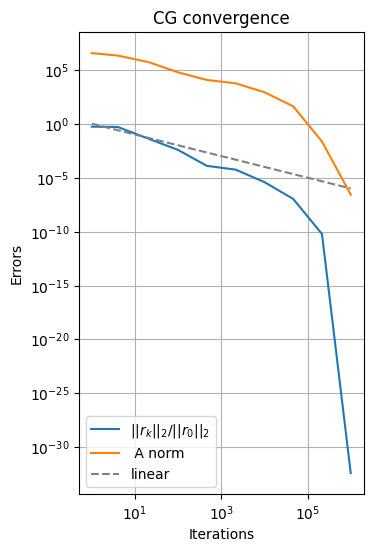

In [5]:
fig, ax = plt.subplots(1,1, figsize = (8,6))
x = samples
ax.plot(data['Iterations'].values, data['ratio'].values, label=r"$||r_k||_2 / ||r_0||_2$")
ax.plot(data['Iterations'].values, data['Anorm'].values, label = ' A norm')
ax.plot(x, 1/x, label = 'linear', c='grey', linestyle = '--')

ax.set(yscale='log', xscale='log', ylabel = 'Errors', xlabel = 'Iterations', title='CG convergence'
       ,aspect=0.25)
ax.legend()
ax.grid()

In [6]:
fig.savefig("results.png", dpi=400)